In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('D:/DIR')

In [3]:
pd.set_option('display.width', 5000)
pd.set_option('display.max_rows',100)

In [4]:
dtrain = pd.read_csv('Project/Project -2 PHARMA/train.csv')
dtest = pd.read_csv('Project/Project -2 PHARMA/test.csv')

In [54]:
pn = dtrain
pt = dtest

In [5]:
dtrain.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


<h> going with the theory that margin, texture and shape cannot be zero for a leaf, changing the all cell with zero to np.nan .<h>

In [5]:
natrain = dtrain[dtrain[dtrain.columns] != 0]
natest = dtest[dtest[dtest.columns] != 0]

In [6]:
FileNameDesc = pd.DataFrame(columns=['ColumnName', 'MissingCount','MissingPercentage','UniqueValues'])
for col in list(natrain.columns.values):
    sum_missing = natrain[col].isnull().sum()
    percent_missing = (sum_missing/len(natrain)) *100
    uniq_count =(natrain.groupby ([col])[col].count()).count()
    FileNameDesc = FileNameDesc.append ({'ColumnName': col,'MissingCount':sum_missing,'MissingPercentage': percent_missing,
                                        'UniqueValues': uniq_count} ,ignore_index=True  )

In [7]:
FileNameDesct = pd.DataFrame(columns=['ColumnName', 'MissingCount','MissingPercentage','UniqueValues'])
for col in list(natest.columns.values):
    sum_missing = natest[col].isnull().sum()
    percent_missing = (sum_missing/len(natest)) *100
    uniq_count =(natest.groupby ([col])[col].count()).count()
    FileNameDesct = FileNameDesct.append ({'ColumnName': col,'MissingCount':sum_missing,'MissingPercentage': percent_missing,
                                        'UniqueValues': uniq_count} ,ignore_index=True  )

In [115]:
#FileNameDesc.to_excel('D:/DIR/train.xlsx')
#FileNameDesct.to_excel('D:/DIR/test.xlsx')

In [8]:
'''Deleting row which has missingpercentage greater than 50'''
FileNameDesc.drop(FileNameDesc[FileNameDesc['MissingPercentage']>50].index, inplace = True)

In [9]:
'''performing same with test dataset'''
FileNameDesct.drop(FileNameDesct[FileNameDesct['MissingPercentage']>50].index,inplace =True)

In [10]:
for i in list(natrain.columns):
    if not i in list(FileNameDesc['ColumnName']):
        natrain.drop([i],axis=1,inplace=True)

In [11]:
for i in list(natest.columns):
    if not i in list(FileNameDesct['ColumnName']):
        natest.drop([i],axis=1,inplace=True)

In [12]:
x = natrain.drop(['id','species'],axis=1)
y = natrain.loc[:,'species']

In [13]:
xtest = natest.drop(['id'],axis=1)

C:\Users\sreen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


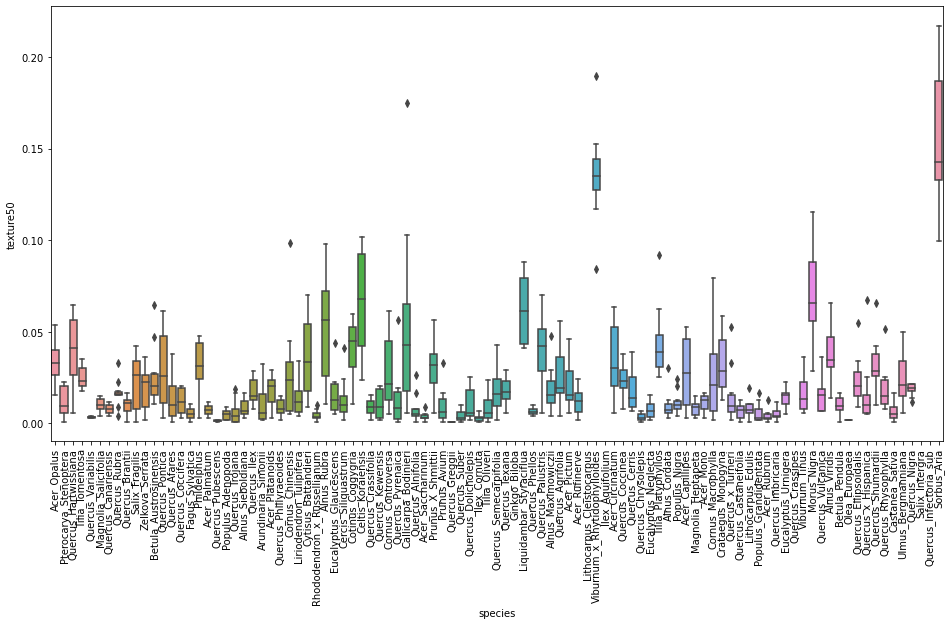

In [138]:
plt.figure(figsize=(16,8))
sns.boxplot('species',y='texture50',data=natrain, )
plt.xticks(rotation=90)
plt.show()

In [14]:
#since we have outliers present in the dataset. Will go with median method for imputation of missing value.
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy='median')
x1 = si.fit_transform(x)

In [15]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy='median')
xtest1 = si.fit_transform(xtest)

In [16]:
xtest1 = pd.DataFrame(xtest1)
xtest1.columns = xtest.columns

In [17]:
x1 = pd.DataFrame(x1)
x1.columns = x.columns

In [18]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
y1=en.fit_transform(y)
y1

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [19]:
y1 = pd.Series(y1)
y1.shape

(990,)

<h>

In [23]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [24]:
pca.fit(x1)

PCA(n_components=0.95)

In [25]:
ptrain = pca.transform(x1)
ptest = pca.transform(xtest1)

In [26]:
ptrain = pd.DataFrame(ptrain)

In [27]:
ptest = pd.DataFrame(ptest)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.naive_bayes as NB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [48]:
def fitmodel(X,Y,algorithm,gridparam,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(ptrain,y1,test_size = 0.20)
    grid = GridSearchCV(estimator=algorithm,param_grid=gridparam,cv=cv,scoring='balanced_accuracy',verbose=1,n_jobs=2)
    grid_result = grid.fit(x_train,y_train)
    best_params = grid_result.best_params_
    pred = grid.predict(x_test)
    print(pred)
    print('Best_Params:', best_params)
    print('Accuracy:', (accuracy_score(y_test,pred)))
    print('Log_loss:', (log_loss(y_test,pred)))

In [34]:
param = {'n_estimators':[200,300],'criterion':['gini','entropy']}
fitmodel(ptrain,y1,RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\sreen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:  4.5min finished


[86 30 23 87 70 49 65 97 61 16 45 62 65 22  9 25 44 73 91 79 55 57 40 13
 94 75 76 43 87 96 74 35 62 31 55 31  1 35 87 30 90 67 96  0 34 83  2 37
 77 83 13 57 98 43 15 89 71 22 66 96 18 27 44 51 52 21 98 12 40 37 85 94
 29 49 81 98 40 33 43 14  3 69 17 32  7  7 76 91 67 42 49 35 58 46 64 82
 64 95  9 71 92 97 33 64 38 72 18 34 30 41 58 66 98 21 75 74  4 24 68 11
  6 60 17  5 87  8 43 89 11  5 22 61 27 77 50 18  0  4 24 59 94 82 46 50
 43  6 47 49 77 16 65 53 50 58 54 55 27 85 71 77 21  9 32 13 52 11 37 56
 12 25 70 63 62 93 25 54 72 57 66 72 27 52  0 59 40 42 12 37 41 27 88 41
 86 84 14 44  8 61]
Best_Params: {'criterion': 'gini', 'n_estimators': 300}
Accuracy: 0.9191919191919192


ValueError: y_true and y_pred contain different number of classes 89, 99. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 37 38 40 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 79 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]

In [41]:
param = {'criterion':['gini','entropy'],'splitter':['best','random']}
fitmodel(ptrain,y1,DecisionTreeClassifier(),param,cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\sreen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    2.3s finished


[43 30 23 28 72 42 65 18 92 35 79 62 51 77 74 25 92 73 20 79 55 36 40  8
 94 75 76 43 28 57 74 35 62 84 55 52 98  9 28 67 90 88 43  0 67 83 28 37
 27 52 95 22 53 18 15 10 26 22 66 40 18 62 81 82 52 30 64  1 40 67 85 52
 67 49 81 56 28 33 79 44  3 65 80 45  7  7 76 91 88 42 42  9 74 46  3 82
 64 95 74 80 92 97 33 69 38 70 18 67 30 41  7 66 73 21 75 74  4 24 61 14
 84 87 17  5 87  8 43 16 11 67 22 61 27 83 50  0  0  4 24 59 94 71 79 66
 43 84 47 49 89 16  0 60 50 58 46 55 27 48 71 88 69  9 32 13 52 14 37 56
 12 25 40 55 44 69 25 74 15 96 81 72 27 50  0 67 40 42 12 38 41 27 31 78
 89 31 14 92 52 96]
Best_Params: {'criterion': 'entropy', 'splitter': 'best'}
Accuracy: 0.4696969696969697


ValueError: y_true and y_pred contain different number of classes 89, 99. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 37 38 40 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 79 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]

In [42]:
param={}
fitmodel(ptrain,y1,NB.GaussianNB(),param,cv=10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[86 30 23 87 70 49 65 97 61 16 45 62 65 28  9 25 44 73 91 79 55 57 40 47
 94 75 76 43 87 96 74 35 62 31 29 31 26 35 30 30 90 67 96  0 34 83  2 38
 77 83 13 57 98 32 15 89 71 22 44 96 18 60 44 51 52 21 30 12 40 29 85 30
 30 49 81 98 28 33 43 14 81 96 17 45  7 26 76 91 67 42 49 35 58 46 64 82
 32 95  9 71 92 97 33 64 28 72 18 34 30 41 58 66 98 21 75 74  4 24 68 11
  6 60 17  5 28  8 43 89 11  5 36 61 27 77 53 18  0  4 24 59 94 80 46 50
 43  6 47 60 44 16 65 53 50 58 54 55 27 26 71 77 21  9 32 13 52 11 37 56
 12 25 70 63 62 93 25 54 72 57 81 72 27 52  0 70 40 42 12 37 41 27 28 41
 86 84 14 44  8 61]
Best_Params: {}


C:\Users\sreen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


Accuracy: 0.8585858585858586


ValueError: y_true and y_pred contain different number of classes 89, 99. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 37 38 40 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 79 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]

In [43]:
param={}
fitmodel(ptrain,y1,NB.MultinomialNB(),param,cv=10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\sreen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished


ValueError: Negative values in data passed to MultinomialNB (input X)

In [44]:
param={}
fitmodel(ptrain,y1,NB.BernoulliNB(),param,cv=10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[86 30 39 87 72 49 65 97 61 16 46 62 65 22  9 25 16 73 91 79 55 57 40 14
 94 75 76 43 87 96 74 35 62 31 55 31  1 35  5 30 90 67 96  0 30 83  2 37
 77 83 13 57 98 43 15 89 63 22 66 96 18  2 44 51 52 21 98 12 40 37 85 94
 30 49 81 98  2 33 43 14  3 69 17 45  7 26 76 91 67 42 49 35 58 46 50 82
 64 95  9 71 92 97 33 64 57 72 18 34 30 41 58 66 98 21 75 74  4 24 68 11
  6 60 17  5 69  8 43 89 11  5 77 61 27 77 53 18  0  4 24 59 94 59 46 87
 43  6 47  4 66 16 65 53 56 58 54 55 27 26 71 77 21  9 32 13 52 13 37 56
 93 25 70 63 66 93 25 54 72 57 66 72 27 52  0 70 40 42 12 37 41 66 69 41
 86 84 14 44  8 61]
Best_Params: {}
Accuracy: 0.8636363636363636


C:\Users\sreen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


ValueError: y_true and y_pred contain different number of classes 89, 99. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 37 38 40 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 79 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]

In [49]:
param = { 'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]}
fitmodel(ptrain,y1,SVC(),param,cv=10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\sreen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.6s
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:  1.1min finished


[86 30 23 87 70 49 65 97 61 16 46 62 65 22  9 25 44 73 91 79 55 57 40 13
 94 75 76 43 87 96 74 35 62 31 55 31  1 35 46 67 90 67 96  0 34 83  2 37
 77 19 13 57 98 43 15 89 82 22 66 96 18 27 44 51 52 21 98 12 40 29 85 94
 34 49 81 98 40 33 43 14  3 96 17 45  7 26 76 91 67 42 49 35 58 46 64 82
 64 95  9 71 92 97 33 64 38 72 18 34 30 41 58 66 98 21 75 74  4 24 68 11
  6 60 17  5 87  8 43 89 11  5 22 61 27 77 56 18  0  4 24 59 94 82 46 87
 43  6 47 49 44 16 65 53 50 58 54 55 27 26 71 77 21  9 32 13 52 11 37 56
 12 25 70 63 77 93 25 54 72 57 66 72 27 52  0 70 40 42 12 37 41 27 88 41
 86 84 14 44  8 61]
Best_Params: {'C': 1000, 'gamma': 0.1}
Accuracy: 0.9545454545454546


ValueError: y_true and y_pred contain different number of classes 89, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 37 38 40 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 79 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]

<h> from above result we could conclude that SVM provides greater accuracy in comparison to other algorithm for this dataset.<h>

In [51]:
sv = SVC(C=1000,gamma=0.1)
sv.fit(ptrain,y1)
ypred = sv.predict(ptest)
print(ypred)

[51 50  1 19 11 86  3 28  6  8 43 13 75 58 52 58 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 78 47 50  4 36 11 55 40 93  8 32  8  9 71 70 38 22
 94 18 48  5 55  7 11 86 96 33 51 98 88 69 21 59 65 11 47  5 13  4 54 57
 29 48 31 98 10  6 25 10 61 43 85 24  1 73 96 83 40 22 48 90 25 21 39 56
 41 95 48 49 98 77  3 12 79 84 53 96 64 57 93 93 40 30  8 88 60 87  6 57
 40 34 27 17 86 27 51 74 37 70 67  2 41 61 24 24 28 28 68 81 42 51 86 96
 43 52 95 64 42 34 95 20 80 35 86  1 56 28 43 75 20 79 46 79 22 79 69 87
 65 24 75 21 37 21 11 10 58  7 27 57 15 45 49 54 43  5 70  7 40 48 89 88
 57 11 64 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 10 13 44 59  0 96
 70 32 29 78 91 51 44 38  5 79 49 58 94 67 10 57 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 96 82 34 39 82 96 47 65 57 64 56 53 55 73  9 86 83 26
 30 63 47 22 36 63 12 78 36 11 27 25 96 38 20 54 76 69 96 24 80 44 92 69
 70 21  7 51 33 77 11 11 97  1 96 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 37 69 95  3 35 83 43 59 58  0 44 77 38 93 55 69

In [58]:
pred_species = en.inverse_transform(ypred)
pred_species

array(['Quercus_Agrifolia', 'Quercus_Afares', 'Acer_Circinatum',
       'Castanea_Sativa', 'Alnus_Maximowiczii', 'Quercus_x_Hispanica',
       'Acer_Opalus', 'Eucalyptus_Glaucescens', 'Acer_Platanoids',
       'Acer_Rufinerve', 'Phildelphus', 'Alnus_Sieboldiana',
       'Quercus_Pubescens', 'Quercus_Coccifera', 'Quercus_Alnifolia',
       'Quercus_Coccifera', 'Populus_Grandidentata',
       'Quercus_Phillyraeoides', 'Alnus_Sieboldiana', 'Quercus_Palustris',
       'Quercus_Crassipes', 'Quercus_Infectoria_sub',
       'Quercus_Chrysolepis', 'Quercus_Rhysophylla', 'Acer_Circinatum',
       'Quercus_Nigra', 'Eucalyptus_Glaucescens', 'Arundinaria_Simonii',
       'Liquidambar_Styraciflua', 'Quercus_Nigra', 'Quercus_Brantii',
       'Quercus_Rubra', 'Prunus_Avium', 'Quercus_Afares', 'Acer_Palmatum',
       'Liriodendron_Tulipifera', 'Alnus_Maximowiczii',
       'Quercus_Castaneifolia', 'Magnolia_Salicifolia',
       'Tilia_Platyphyllos', 'Acer_Rufinerve', 'Ginkgo_Biloba',
       'Acer_Rufin

In [59]:
dtest['pred_species'] = pred_species
dtest

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,pred_species
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711,Quercus_Agrifolia
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922,Quercus_Afares
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000,Acer_Circinatum
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789,Castanea_Sativa
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812,Alnus_Maximowiczii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977,Acer_Circinatum
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602,Alnus_Rubra
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836,Quercus_Canariensis
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555,Quercus_Phillyraeoides


In [61]:
titles = list(dtest.columns)
a = titles.pop(0)
titles.insert(1,a)
titles

194

In [66]:
dtest = dtest[titles]
dtest

,id,pred_species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,Quercus_Agrifolia,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,Quercus_Afares,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,Acer_Circinatum,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,Castanea_Sativa,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,Alnus_Maximowiczii,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,Acer_Circinatum,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,Alnus_Rubra,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,Quercus_Canariensis,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,Quercus_Phillyraeoides,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555
